<a href="https://colab.research.google.com/github/nishunath/worldcloud-fun/blob/main/yt_video_emo_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Yt video: https://www.youtube.com/watch?v=Sg8NjU_WRX8 
Github: https://github.com/souravBhandari/Emotions

In [ ]:
import numpy as np
import pandas as pd
path="/content/drive/MyDrive/Emotion Detection 6-7-2021/ANAD.csv"
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
df = pd.read_csv(path)
df.describe

<bound method NDFrame.describe of                 name   Emotion   ...  F0env_sma_de_iqr23  F0env_sma_de_iqr13
0      V2_1 (1).wav'  surprised  ...            1.819850            2.028063
1      V2_1 (2).wav'  surprised  ...            2.323913            3.003057
2      V2_1 (3).wav'  surprised  ...            1.825973            2.663894
3      V2_1 (4).wav'  surprised  ...            2.923499            3.138976
4      V2_1 (5).wav'  surprised  ...            2.654283            3.087905
...              ...        ...  ...                 ...                 ...
1378  V8_86 (1).wav'      happy  ...            1.738371            2.449720
1379  V8_86 (2).wav'      happy  ...            0.439748            1.654264
1380  V8_86 (3).wav'      happy  ...            2.010342            2.758023
1381  V8_87 (1).wav'      happy  ...            1.703708            1.703708
1382  V8_87 (2).wav'      happy  ...            0.609424            1.607337

[1383 rows x 846 columns]>

In [ ]:
df.head()

,name,Emotion,pcm_intensity_sma_max,pcm_intensity_sma_min,pcm_intensity_sma_range,pcm_intensity_sma_maxPos,pcm_intensity_sma_minPos,pcm_intensity_sma_amean,pcm_intensity_sma_linregc1,pcm_intensity_sma_linregc2,pcm_intensity_sma_linregerrA,pcm_intensity_sma_stddev,pcm_intensity_sma_skewness,pcm_intensity_sma_kurtosis,pcm_intensity_sma_quartile2,pcm_intensity_sma_quartile3,pcm_intensity_sma_iqr23,pcm_intensity_sma_iqr13,pcm_fftMag_mfcc_sma1_max,pcm_fftMag_mfcc_sma1_min,pcm_fftMag_mfcc_sma1_range,pcm_fftMag_mfcc_sma1_maxPos,pcm_fftMag_mfcc_sma1_minPos,pcm_fftMag_mfcc_sma1_amean,pcm_fftMag_mfcc_sma1_linregc1,pcm_fftMag_mfcc_sma1_linregc2,pcm_fftMag_mfcc_sma1_linregerrA,pcm_fftMag_mfcc_sma1_linregerrQ,pcm_fftMag_mfcc_sma1_stddev,pcm_fftMag_mfcc_sma1_skewness,pcm_fftMag_mfcc_sma1_kurtosis,pcm_fftMag_mfcc_sma1_quartile1,pcm_fftMag_mfcc_sma1_quartile2,pcm_fftMag_mfcc_sma1_quartile3,pcm_fftMag_mfcc_sma1_iqr12,pcm_fftMag_mfcc_sma1_iqr23,pcm_fftMag_mfcc_sma1_iqr13,pcm_fftMag_mfcc_sma2_min,pcm_fftMag_mfcc_sma2_range,pcm_fftMag_mfcc_sma2_maxPos,...,voiceProb_sma_de_quartile1,voiceProb_sma_de_quartile2,voiceProb_sma_de_quartile3,voiceProb_sma_de_iqr12,voiceProb_sma_de_iqr23,voiceProb_sma_de_iqr13,F0_sma_de_max,F0_sma_de_min,F0_sma_de_range,F0_sma_de_amean,F0_sma_de_linregc1,F0_sma_de_linregc2,F0_sma_de_linregerrA,F0_sma_de_linregerrQ,F0_sma_de_stddev,F0_sma_de_skewness,F0_sma_de_kurtosis,F0_sma_de_quartile1,F0_sma_de_quartile2,F0_sma_de_iqr12,F0_sma_de_iqr23,F0env_sma_de_max,F0env_sma_de_min,F0env_sma_de_range,F0env_sma_de_maxPos,F0env_sma_de_minPos,F0env_sma_de_amean,F0env_sma_de_linregc1,F0env_sma_de_linregc2,F0env_sma_de_linregerrA,F0env_sma_de_linregerrQ,F0env_sma_de_stddev,F0env_sma_de_skewness,F0env_sma_de_kurtosis,F0env_sma_de_quartile1,F0env_sma_de_quartile2,F0env_sma_de_quartile3,F0env_sma_de_iqr12,F0env_sma_de_iqr23,F0env_sma_de_iqr13
0,V2_1 (1).wav',surprised,0.000002,0,0.000002,39,0,0.0,0.0,0.0,0.0,0.0,1.417807,4.322336,0.0,0.000001,0.0,0.000001,1.055819,-45.65966,46.71548,40,75,-11.857210,-0.270896,0.333128,8.160779,118.95030,13.02251,-1.284218,3.584580,-13.47079,-9.038938,-1.020302,4.431851,8.018636,12.45049,-21.41446,47.29685,76,...,-0.007315,0.000000,0.024483,0.007315,0.024483,0.031798,66.74595,-57.10629,123.8522,2.399732,-0.002897,2.530077,10.71659,368.9233,19.20753,0.788902,7.182367,-1.435499,0.000000,1.435499,0.000000,33.08804,-2.265363,35.35340,27,88,2.446616,-0.053927,4.873343,3.983000,44.29016,6.804174,3.144908,12.621420,-0.208212,0.000000,1.819850,0.208212,1.819850,2.028063
1,V2_1 (2).wav',surprised,0.000002,0,0.000002,38,0,0.0,0.0,0.0,0.0,0.0,1.313596,3.697468,0.0,0.000001,0.0,0.000001,6.054396,-38.35849,44.41289,8,76,-10.741420,-0.257351,0.839360,7.954068,96.36932,11.91921,-0.809760,2.944028,-14.04066,-10.078480,-2.414511,3.962176,7.663968,11.62614,-19.79713,55.83598,75,...,-0.017062,0.000153,0.022161,0.017215,0.022008,0.039223,67.36360,-57.44310,124.8067,2.292438,-0.041496,4.159742,12.74873,407.7806,20.22297,0.285302,5.289831,-1.469311,-0.034900,1.434411,5.348474,20.55317,-2.803198,23.35637,3,88,2.416934,-0.099954,6.914886,2.768344,15.28410,4.709333,2.091973,7.180433,-0.068987,0.610156,2.934069,0.679144,2.323913,3.003057
2,V2_1 (3).wav',surprised,0.000002,0,0.000002,38,0,0.0,0.0,0.0,0.0,0.0,1.432917,4.121644,0.0,0.000000,0.0,0.000000,2.461585,-43.14096,45.60255,90,76,-13.240020,-0.183616,-4.977293,7.841158,119.78020,11.96008,-1.246133,3.555403,-14.83464,-10.482420,-6.096719,4.352217,4.385703,8.73792,-21.10271,45.24276,76,...,-0.019787,-0.000701,0.021939,0.019086,0.022640,0.041726,70.14671,-73.56588,143.7126,2.195976,-0.045190,4.229533,15.44379,661.2593,25.74235,0.299845,4.601072,-1.649715,0.000000,1.649715,2.298878,36.86413,-6.775864,43.63999,2,27,2.395509,-0.149378,9.117499,4.710866,46.80196,7.886595,2.563328,9.669317,-0.837921,0.000000,1.825973,0.837921,1.825973,2.663894
3,V2_1 (4).wav',surprised,0.000002,0,0.000002,38,0,0.0,0.0,0.0,0.0,0.0,1.313702,4.002068,0.0,0.000001,0.0,0.000001,13.921550,-43.83440,57.75595,

['surprised' 'angry' 'happy']


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


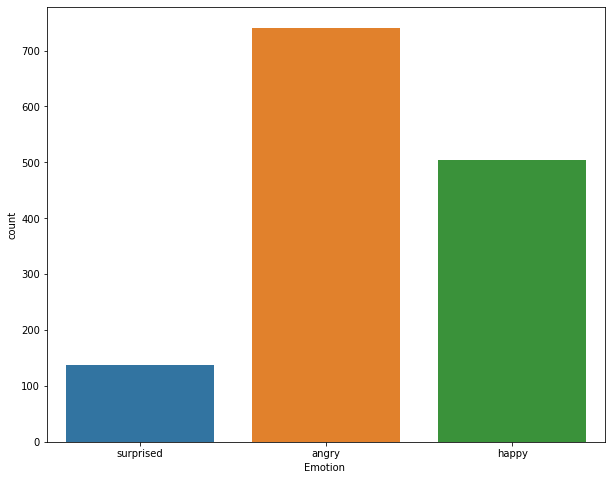

null values 0


In [ ]:
print(df['Emotion '].unique())

plt.figure(figsize = (10, 8))
sns.countplot(df['Emotion '])
plt.show()

print("null values",df.isnull().sum().sum()) # 0

In [ ]:

X = df.drop(['name', 'Emotion '], axis = 1) #features
y = df['Emotion '] #labels
X.head(5)

,pcm_intensity_sma_max,pcm_intensity_sma_min,pcm_intensity_sma_range,pcm_intensity_sma_maxPos,pcm_intensity_sma_minPos,pcm_intensity_sma_amean,pcm_intensity_sma_linregc1,pcm_intensity_sma_linregc2,pcm_intensity_sma_linregerrA,pcm_intensity_sma_stddev,pcm_intensity_sma_skewness,pcm_intensity_sma_kurtosis,pcm_intensity_sma_quartile2,pcm_intensity_sma_quartile3,pcm_intensity_sma_iqr23,pcm_intensity_sma_iqr13,pcm_fftMag_mfcc_sma1_max,pcm_fftMag_mfcc_sma1_min,pcm_fftMag_mfcc_sma1_range,pcm_fftMag_mfcc_sma1_maxPos,pcm_fftMag_mfcc_sma1_minPos,pcm_fftMag_mfcc_sma1_amean,pcm_fftMag_mfcc_sma1_linregc1,pcm_fftMag_mfcc_sma1_linregc2,pcm_fftMag_mfcc_sma1_linregerrA,pcm_fftMag_mfcc_sma1_linregerrQ,pcm_fftMag_mfcc_sma1_stddev,pcm_fftMag_mfcc_sma1_skewness,pcm_fftMag_mfcc_sma1_kurtosis,pcm_fftMag_mfcc_sma1_quartile1,pcm_fftMag_mfcc_sma1_quartile2,pcm_fftMag_mfcc_sma1_quartile3,pcm_fftMag_mfcc_sma1_iqr12,pcm_fftMag_mfcc_sma1_iqr23,pcm_fftMag_mfcc_sma1_iqr13,pcm_fftMag_mfcc_sma2_min,pcm_fftMag_mfcc_sma2_range,pcm_fftMag_mfcc_sma2_maxPos,pcm_fftMag_mfcc_sma2_minPos,pcm_fftMag_mfcc_sma2_amean,...,voiceProb_sma_de_quartile1,voiceProb_sma_de_quartile2,voiceProb_sma_de_quartile3,voiceProb_sma_de_iqr12,voiceProb_sma_de_iqr23,voiceProb_sma_de_iqr13,F0_sma_de_max,F0_sma_de_min,F0_sma_de_range,F0_sma_de_amean,F0_sma_de_linregc1,F0_sma_de_linregc2,F0_sma_de_linregerrA,F0_sma_de_linregerrQ,F0_sma_de_stddev,F0_sma_de_skewness,F0_sma_de_kurtosis,F0_sma_de_quartile1,F0_sma_de_quartile2,F0_sma_de_iqr12,F0_sma_de_iqr23,F0env_sma_de_max,F0env_sma_de_min,F0env_sma_de_range,F0env_sma_de_maxPos,F0env_sma_de_minPos,F0env_sma_de_amean,F0env_sma_de_linregc1,F0env_sma_de_linregc2,F0env_sma_de_linregerrA,F0env_sma_de_linregerrQ,F0env_sma_de_stddev,F0env_sma_de_skewness,F0env_sma_de_kurtosis,F0env_sma_de_quartile1,F0env_sma_de_quartile2,F0env_sma_de_quartile3,F0env_sma_de_iqr12,F0env_sma_de_iqr23,F0env_sma_de_iqr13
0,0.000002,0,0.000002,39,0,0.0,0.0,0.0,0.0,0.0,1.417807,4.322336,0.0,0.000001,0.0,0.000001,1.055819,-45.65966,46.71548,40,75,-11.857210,-0.270896,0.333128,8.160779,118.95030,13.02251,-1.284218,3.584580,-13.47079,-9.038938,-1.020302,4.431851,8.018636,12.45049,-21.41446,47.29685,76,22,3.773540,...,-0.007315,0.000000,0.024483,0.007315,0.024483,0.031798,66.74595,-57.10629,123.8522,2.399732,-0.002897,2.530077,10.71659,368.9233,19.20753,0.788902,7.182367,-1.435499,0.000000,1.435499,0.000000,33.08804,-2.265363,35.35340,27,88,2.446616,-0.053927,4.873343,3.983000,44.29016,6.804174,3.144908,12.621420,-0.208212,0.000000,1.819850,0.208212,1.819850,2.028063
1,0.000002,0,0.000002,38,0,0.0,0.0,0.0,0.0,0.0,1.313596,3.697468,0.0,0.000001,0.0,0.000001,6.054396,-38.35849,44.41289,8,76,-10.741420,-0.257351,0.839360,7.954068,96.36932,11.91921,-0.809760,2.944028,-14.04066,-10.078480,-2.414511,3.962176,7.663968,11.62614,-19.79713,55.83598,75,22,4.392091,...,-0.017062,0.000153,0.022161,0.017215,0.022008,0.039223,67.36360,-57.44310,124.8067,2.292438,-0.041496,4.159742,12.74873,407.7806,20.22297,0.285302,5.289831,-1.469311,-0.034900,1.434411,5.348474,20.55317,-2.803198,23.35637,3,88,2.416934,-0.099954,6.914886,2.768344,15.28410,4.709333,2.091973,7.180433,-0.068987,0.610156,2.934069,0.679144,2.323913,3.003057
2,0.000002,0,0.000002,38,0,0.0,0.0,0.0,0.0,0.0,1.432917,4.121644,0.0,0.000000,0.0,0.000000,2.461585,-43.14096,45.60255,90,76,-13.240020,-0.183616,-4.977293,7.841158,119.78020,11.96008,-1.246133,3.555403,-14.83464,-10.482420,-6.096719,4.352217,4.385703,8.73792,-21.10271,45.24276,76,22,4.920425,...,-0.019787,-0.000701,0.021939,0.019086,0.022640,0.041726,70.14671,-73.56588,143.7126,2.195976,-0.045190,4.229533,15.44379,661.2593,25.74235,0.299845,4.601072,-1.649715,0.000000,1.649715,2.298878,36.86413,-6.775864,43.63999,2,27,2.395509,-0.149378,9.117499,4.710866,46.80196,7.886595,2.563328,9.669317,-0.837921,0.000000,1.825973,0.837921,1.825973,2.663894
3,0.000002,0,0.000002,38,0,0.0,0.0,0.0,0.0,0.0,1.313702,4.002068,0.0,0.000001,0.0,0.000001,13.921550,-43.83440,57.75595,19,74,-8.878107,-0

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 1)


In [ ]:
#1 Model - Logistic Regression
m1 = LogisticRegression()
m1.fit(X_train, y_train)
pred1 = m1.predict(X_test)
print(classification_report(y_test, pred1))


              precision    recall  f1-score   support

       angry       0.89      0.87      0.88       224
       happy       0.83      0.89      0.86       151
   surprised       0.48      0.40      0.44        40

    accuracy                           0.83       415
   macro avg       0.73      0.72      0.72       415
weighted avg       0.83      0.83      0.83       415



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
# 2 model - Random Forest
grid = {'n_estimators': [10, 50, 100, 300]}
m2 = GridSearchCV(RandomForestClassifier(), grid)
m2.fit(X_train, y_train)
print(m2.best_params_)
pred2 = m2.predict(X_test)
print(classification_report(y_test, pred2))


{'n_estimators': 300}
              precision    recall  f1-score   support

       angry       0.96      0.99      0.97       224
       happy       0.94      0.97      0.95       151
   surprised       0.96      0.65      0.78        40

    accuracy                           0.95       415
   macro avg       0.95      0.87      0.90       415
weighted avg       0.95      0.95      0.95       415



In [ ]:
# 3 Model - Gradient boast
grid = {
    'learning_rate': [0.3, 0.1, 0.5], 
    'n_estimators': [100, 300], 
    'max_depth': [1, 3, 9]
}

In [ ]:
m3 = GridSearchCV(GradientBoostingClassifier(), grid, verbose = 2)
m3.fit(X_train, y_train) 
print(m3.best_params_)
pred3 = m3.predict(X_test)
print(classification_report(y_test, pred3))

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] learning_rate=0.3, max_depth=1, n_estimators=100 ................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] . learning_rate=0.3, max_depth=1, n_estimators=100, total=  18.1s
[CV] learning_rate=0.3, max_depth=1, n_estimators=100 ................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   18.1s remaining:    0.0s


[CV] . learning_rate=0.3, max_depth=1, n_estimators=100, total=  18.0s
[CV] learning_rate=0.3, max_depth=1, n_estimators=100 ................
[CV] . learning_rate=0.3, max_depth=1, n_estimators=100, total=  18.0s
[CV] learning_rate=0.3, max_depth=1, n_estimators=100 ................
[CV] . learning_rate=0.3, max_depth=1, n_estimators=100, total=  18.1s
[CV] learning_rate=0.3, max_depth=1, n_estimators=100 ................
[CV] . learning_rate=0.3, max_depth=1, n_estimators=100, total=  18.0s
[CV] learning_rate=0.3, max_depth=1, n_estimators=300 ................
[CV] . learning_rate=0.3, max_depth=1, n_estimators=300, total=  53.9s
[CV] learning_rate=0.3, max_depth=1, n_estimators=300 ................
[CV] . learning_rate=0.3, max_depth=1, n_estimators=300, total=  53.9s
[CV] learning_rate=0.3, max_depth=1, n_estimators=300 ................
[CV] . learning_rate=0.3, max_depth=1, n_estimators=300, total=  53.9s
[CV] learning_rate=0.3, max_depth=1, n_estimators=300 ................
[CV] .

[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed: 55.6min finished


{'learning_rate': 0.3, 'max_depth': 3, 'n_estimators': 100}
              precision    recall  f1-score   support

       angry       0.97      0.99      0.98       224
       happy       0.98      0.96      0.97       151
   surprised       0.89      0.85      0.87        40

    accuracy                           0.97       415
   macro avg       0.95      0.93      0.94       415
weighted avg       0.97      0.97      0.97       415

